In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("energy.csv")

image_order = ["500b", "100Kb", "256Kb", "1Mb", "15Mb"]

color_mapping = {
    "pillow": "#17becf",
    "wand": "#ff7f0e",
    "pygame": "#f0e68c",
    "opencv": "#27ae60"
}

bar_width = 0.18

def max_abs_scale(series):
    return series / series.abs().max()

###Energy

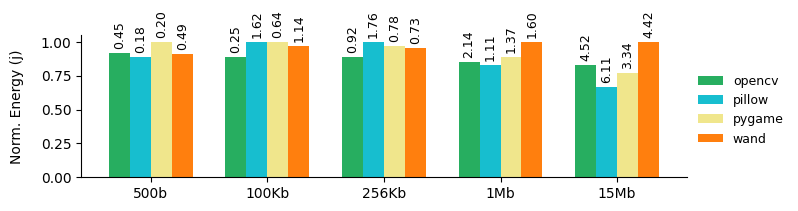

In [3]:
dftt = df.copy()

mean_df = dftt.groupby(['library', 'image'], as_index=False)['cpu0_package_joules'].mean()
mean_df.rename(columns={'cpu0_package_joules': 'mean_cpu0_package_joules'}, inplace=True)
std_df = dftt.groupby(['library', 'image'], as_index=False)['cpu0_package_joules'].std()
std_df.rename(columns={'cpu0_package_joules': 'std_cpu0_package_joules'}, inplace=True)

dftt = std_df.merge(mean_df, on=['library', 'image'])

dfe_max_abs = dftt.copy()

dfe_max_abs['mean_cpu0_package_joules'] = dfe_max_abs.groupby('image')['mean_cpu0_package_joules'].transform(max_abs_scale)

dfe_max_abs['image'] = pd.Categorical(dfe_max_abs['image'], categories=image_order, ordered=True)

dfe_max_abs = dfe_max_abs.sort_values(['library', 'image'])

# Define the libraries and image sizes
libraries = dfe_max_abs['library'].unique()
image_sizes = dfe_max_abs['image'].unique()

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 2.2))

# Set the positions of the bars on the x-axis
positions = np.arange(len(image_sizes))

# Plot each image size
for i, library in enumerate(libraries):
    subset = dfe_max_abs[dfe_max_abs['library'] == library]
    bar_positions = positions + i * bar_width
    bars = ax.bar(bar_positions, subset['mean_cpu0_package_joules'], width=bar_width, label=library, color=color_mapping[library])

    for bar, std in zip(bars, subset['std_cpu0_package_joules']):
        height = bar.get_height()
        ax.annotate(f'{std:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom',
                    fontsize=9, rotation=90)

# Set the labels and title
ax.set_ylabel('Norm. Energy (j)', fontsize=10, labelpad=12)
ax.spines[['right', 'top']].set_visible(False)

# Set the x-ticks and labels
ax.set_xticks(positions + bar_width * (len(libraries) - 1) / 2)
ax.set_xticklabels(image_sizes)

ax.legend(
    bbox_to_anchor=(1, 0.8), loc='upper left', ncols = 1, frameon=False, fontsize=9
)

# plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [4]:
df = pd.read_csv("result.csv")

def max_abs_scale(series):
    return series / series.abs().max()

image_order = ["500b", "100Kb", "256Kb", "1Mb", "15Mb"]

color_mapping = {
    "pillow": "#17becf",
    "wand": "#ff7f0e",
    "pygame": "#f0e68c",
    "opencv": "#27ae60"
}

bar_width = 0.15
df.head()

,compute_time,download_size,download_time,image,library,upload_size,upload_time
0,0.002415,100000,1.165014,100Kb,pillow,1454,0.436945
1,0.015611,100000,1.187698,100Kb,pillow,1454,0.552563
2,0.002416,100000,1.174461,100Kb,pillow,1454,0.402476
3,0.002414,100000,1.184530,100Kb,pillow,1454,0.402740
4,0.002398,100000,1.287538,100Kb,pillow,1454,0.402400


###Compute Time

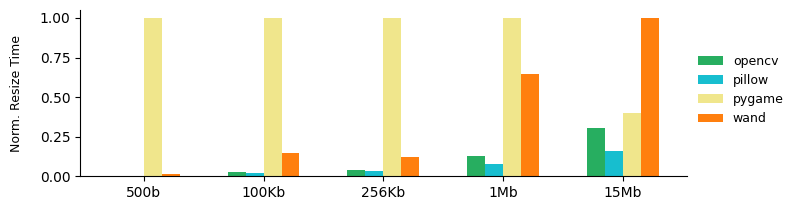

In [5]:
dfct = df.copy()

dfct = dfct.groupby(['library', 'image'], as_index = False)['compute_time'].mean()

dfct['normalized_compute_time'] = dfct.groupby('image')['compute_time'].transform(max_abs_scale)

dfct['image'] = pd.Categorical(dfct['image'], categories=image_order, ordered=True)

dfct = dfct.sort_values(['library', 'image'])

# Define the libraries and image sizes
libraries = dfct['library'].unique()
image_sizes = dfct['image'].unique()

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 2.2))

# Set the positions of the bars on the x-axis
positions = np.arange(len(image_sizes))

# Plot each image size
for i, library in enumerate(libraries):
    subset = dfct[dfct['library'] == library]
    bar_positions = positions + i * bar_width
    ax.bar(bar_positions, subset['normalized_compute_time'], width=bar_width, label=library, color=color_mapping[library])

# Set the labels and title
ax.set_ylabel('Norm. Resize Time', fontsize=9, labelpad=12)

ax.spines[['right', 'top']].set_visible(False)

# Set the x-ticks and labels
ax.set_xticks(positions + bar_width * (len(libraries) - 1) / 2)
ax.set_xticklabels(image_sizes)
ax.legend(
    bbox_to_anchor=(1, 0.8), loc='upper left', ncols = 1, frameon=False, fontsize=9
)

# plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

###Upload Size

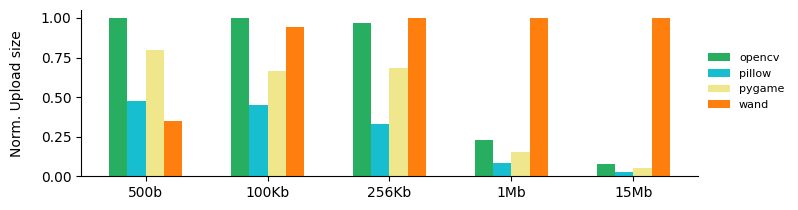

In [6]:
dfus = df.copy()

dfus = dfus.groupby(['library', 'image'], as_index = False)['upload_size'].mean()

dfus['normalized_upload_size'] = dfus.groupby('image')['upload_size'].transform(max_abs_scale)

dfus['image'] = pd.Categorical(dfus['image'], categories=image_order, ordered=True)

dfus = dfus.sort_values(['library', 'image'])

libraries = dfus['library'].unique()
image_sizes = dfus['image'].unique()

fig, ax = plt.subplots(figsize=(8, 2.2))

# Plot each image size
for i, library in enumerate(libraries):
    subset = dfus[dfus['library'] == library]
    bar_positions = positions + i * bar_width
    ax.bar(bar_positions, subset['normalized_upload_size'], width=bar_width, label=library, color=color_mapping[library])

ax.set_ylabel('Norm. Upload size', fontsize=10, labelpad=12)
ax.spines[['right', 'top']].set_visible(False)

ax.set_xticks(positions + bar_width * (len(libraries) - 1) / 2)
ax.set_xticklabels(image_sizes)

ax.legend(
    bbox_to_anchor=(1, 0.8), loc='upper left', ncols = 1, frameon=False, fontsize=8
)

plt.tight_layout()
plt.show()


###Total Time

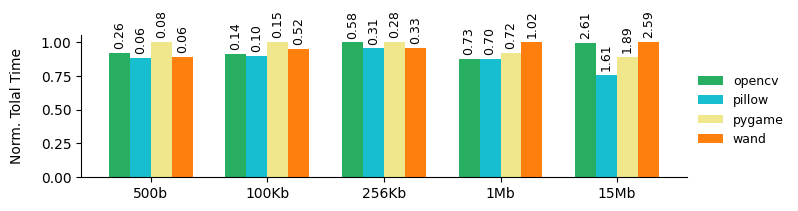

In [7]:
bar_width = 0.18

df["total_time"] = df["compute_time"] + df["upload_time"] + df["download_time"]

dftt = df.copy()

mean_df = dftt.groupby(['library', 'image'], as_index=False)['total_time'].mean()
mean_df.rename(columns={'total_time': 'mean_total_time'}, inplace=True)
std_df = dftt.groupby(['library', 'image'], as_index=False)['total_time'].std()
std_df.rename(columns={'total_time': 'std_total_time'}, inplace=True)

dftt = std_df.merge(mean_df, on=['library', 'image'])

dftt['normalized_total_time'] = dftt.groupby('image')['mean_total_time'].transform(max_abs_scale)

dftt['image'] = pd.Categorical(dftt['image'], categories=image_order, ordered=True)

dftt = dftt.sort_values(['library', 'image'])

libraries = dftt['library'].unique()
image_sizes = dftt['image'].unique()

fig, ax = plt.subplots(figsize=(8, 2.2))

positions = np.arange(len(image_sizes))

for i, library in enumerate(libraries):
    subset = dftt[dftt['library'] == library]
    bar_positions = positions + i * bar_width
    bars = ax.bar(bar_positions, subset['normalized_total_time'], width=bar_width, label=library, color=color_mapping[library])

    for bar, std in zip(bars, subset['std_total_time']):
        height = bar.get_height()
        ax.annotate(f'{std:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom',
                    fontsize=9, rotation=90)

ax.set_ylabel('Norm. Tolal Time', fontsize=10, labelpad=12)
ax.spines[['right', 'top']].set_visible(False)
ax.set_xticks(positions + bar_width * (len(libraries) - 1) / 2)
ax.set_xticklabels(image_sizes)
ax.legend(
    bbox_to_anchor=(1, 0.8), loc='upper left', ncols = 1, frameon=False, fontsize=9
)

plt.tight_layout()
plt.show()